In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

np.random.seed(6969)

In [138]:
def Franke(x, y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def FrankeNoise(x, y, sigma=0.01):
    return Franke(x, y) + np.random.normal(0, sigma, np.shape(x))

In [139]:
nr_points_per_dim = 1001
nr_datapoints = nr_points_per_dim**2

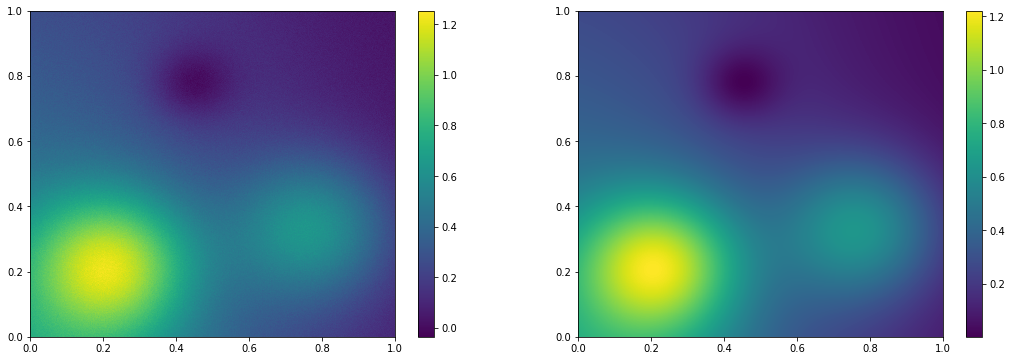

In [140]:
x = np.linspace(0, 1, nr_points_per_dim)
y = np.linspace(0, 1, nr_points_per_dim)
#x = np.random.uniform(0, 1, nr_points_per_dim)
#y = np.random.uniform(0, 1, nr_points_per_dim)
x_, y_ = np.meshgrid(x, y)

x_flat = x_.flatten()
y_flat = y_.flatten()

data = FrankeNoise(x_, y_)
f = data.flatten()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
plt1 = ax1.pcolormesh(x_, y_, FrankeNoise(x_,y_));
fig.colorbar(plt1, ax=ax1);

plt2 = ax2.pcolormesh(x_, y_, Franke(x_, y_))
fig.colorbar(plt2, ax=ax2);

In [141]:
# beta = [c, cx, cy]

X = np.zeros((nr_datapoints, 21))
X[:,0] = 1

i = 0
for ix in range(6):
    for iy in range(6):
        if 0 < ix + iy < 6:
            i += 1
            X[:,i] = x_flat**ix*y_flat**iy

def Model(beta, x, y):
    i = 0
    result = beta[0]
    for ix in range(6):
        for iy in range(6):
            if 0 < ix + iy < 6:
                i += 1
                result += beta[i]*x**ix*y**iy
    return result

In [142]:
beta = np.linalg.inv(X.T@X)@X.T@f
pred_data = Model(beta, x_, y_)

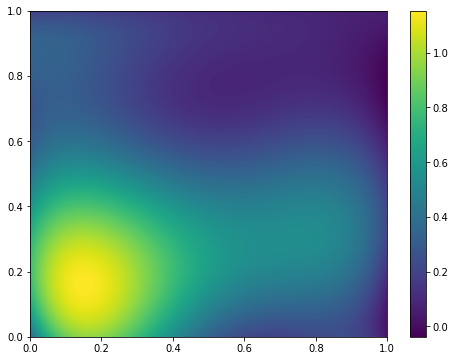

In [143]:
plt.figure(figsize=(8,6))
plt.pcolormesh(x_, y_, pred_data)
plt.colorbar();

In [144]:
MSE(data, pred_data), np.sqrt(MSE(data, pred_data))/np.mean(data)

(0.002110732823681699, 0.1129346802196399)

In [145]:
r2_score(data, pred_data)

0.9458727685586766